[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv10 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2405.14458-b31b1b.svg)](https://arxiv.org/pdf/2405.14458.pdf)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yolov10)


## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv10
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat May 25 14:56:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv10

In [3]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 3.5 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 62.9 MB/s eta 0:00:00


## Download pre-trained weights

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [6]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 104K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg


## Inference with Pre-trained COCO Model

### 💻 CLI

In [7]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/data/dog.jpeg: 640x384 1 0, 1 16, 81.4ms
Speed: 12.9ms preprocess, 81.4ms inference, 374.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NONE:** Let's display result.

/content


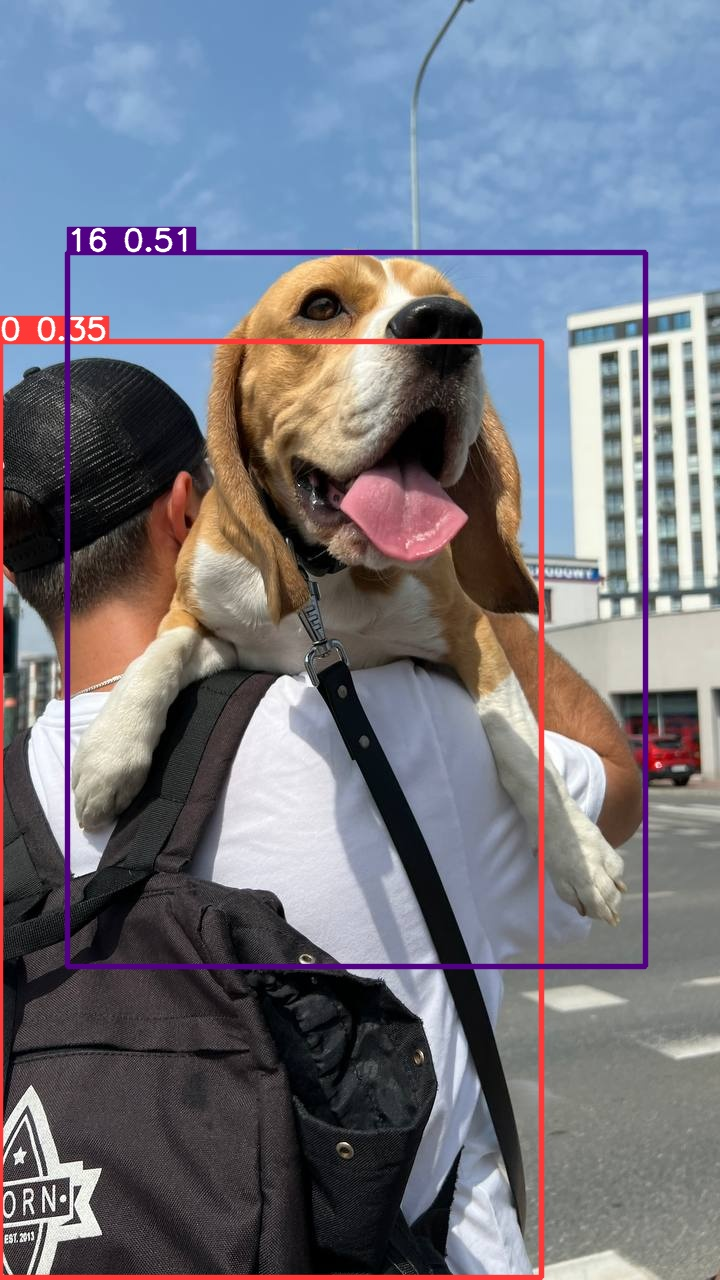

In [8]:
from IPython.display import Image

%cd {HOME}

Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

In [9]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/dog.jpeg', conf=0.25)


image 1/1 /content/data/dog.jpeg: 640x384 1 0, 1 16, 98.3ms
Speed: 3.2ms preprocess, 98.3ms inference, 164.4ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
results[0].boxes.xyxy

tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.5090, 0.3536], device='cuda:0')

In [12]:
results[0].boxes.cls

tensor([16.,  0.], device='cuda:0')

**NONE:** Let's display result.


0: 640x384 1 0, 1 16, 10.5ms
Speed: 1.6ms preprocess, 10.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


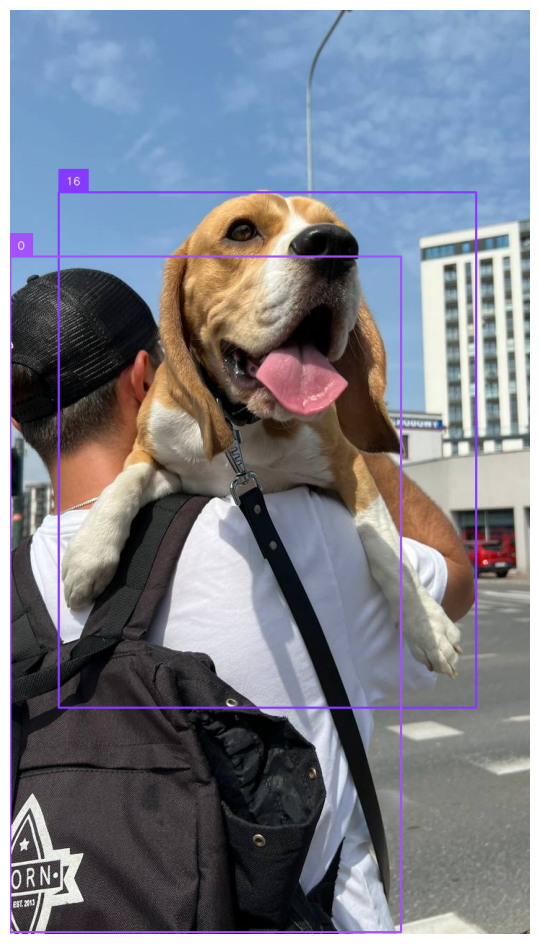

In [13]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/dog.jpeg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="YVG0asIRIReZMKttSddm")
project = rf.workspace("dogan-1mhov").project("oniondetection-rtzqv")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to OnionDetection-2 in yolov8:: 100%|██████████| 1514/1514 [00:00<00:00, 5703.34it/s]


## Custom Training

In [16]:
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=5 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/datasets/OnionDetection-2/data.yaml, epochs=100, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

In [17]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1716649461.aad48185dd50.2474.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch11880.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch11881.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch11882.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


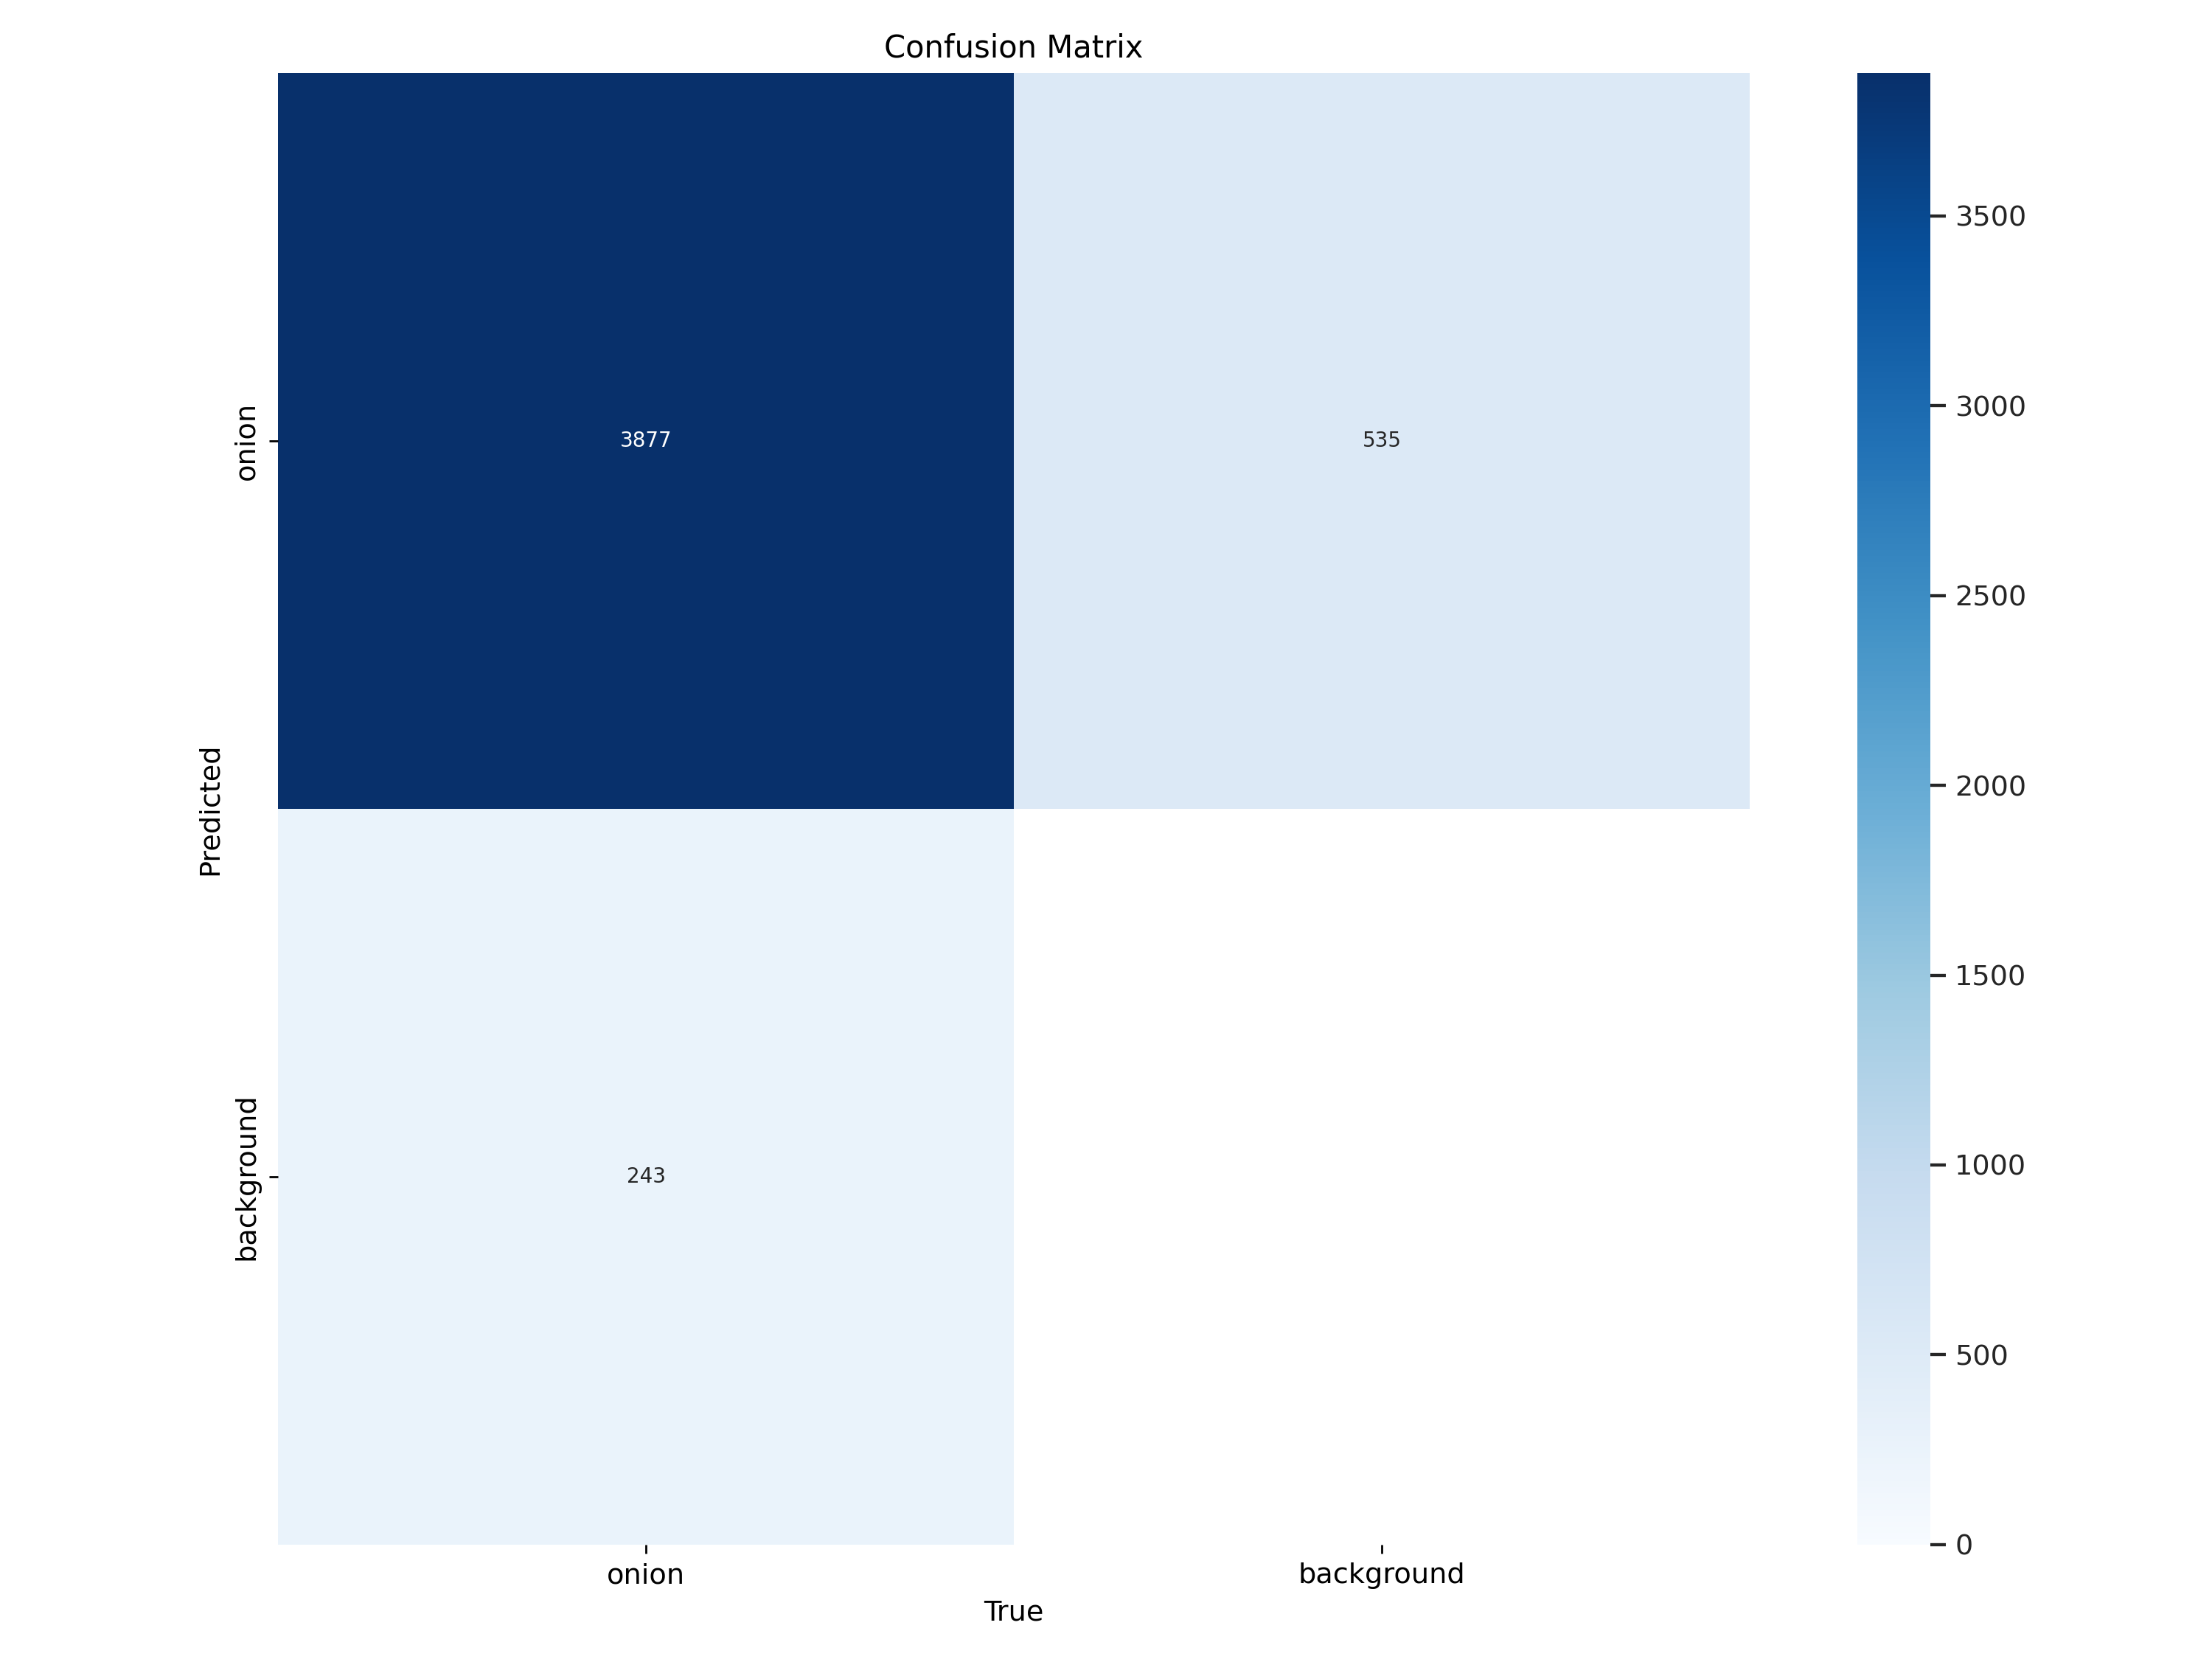

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


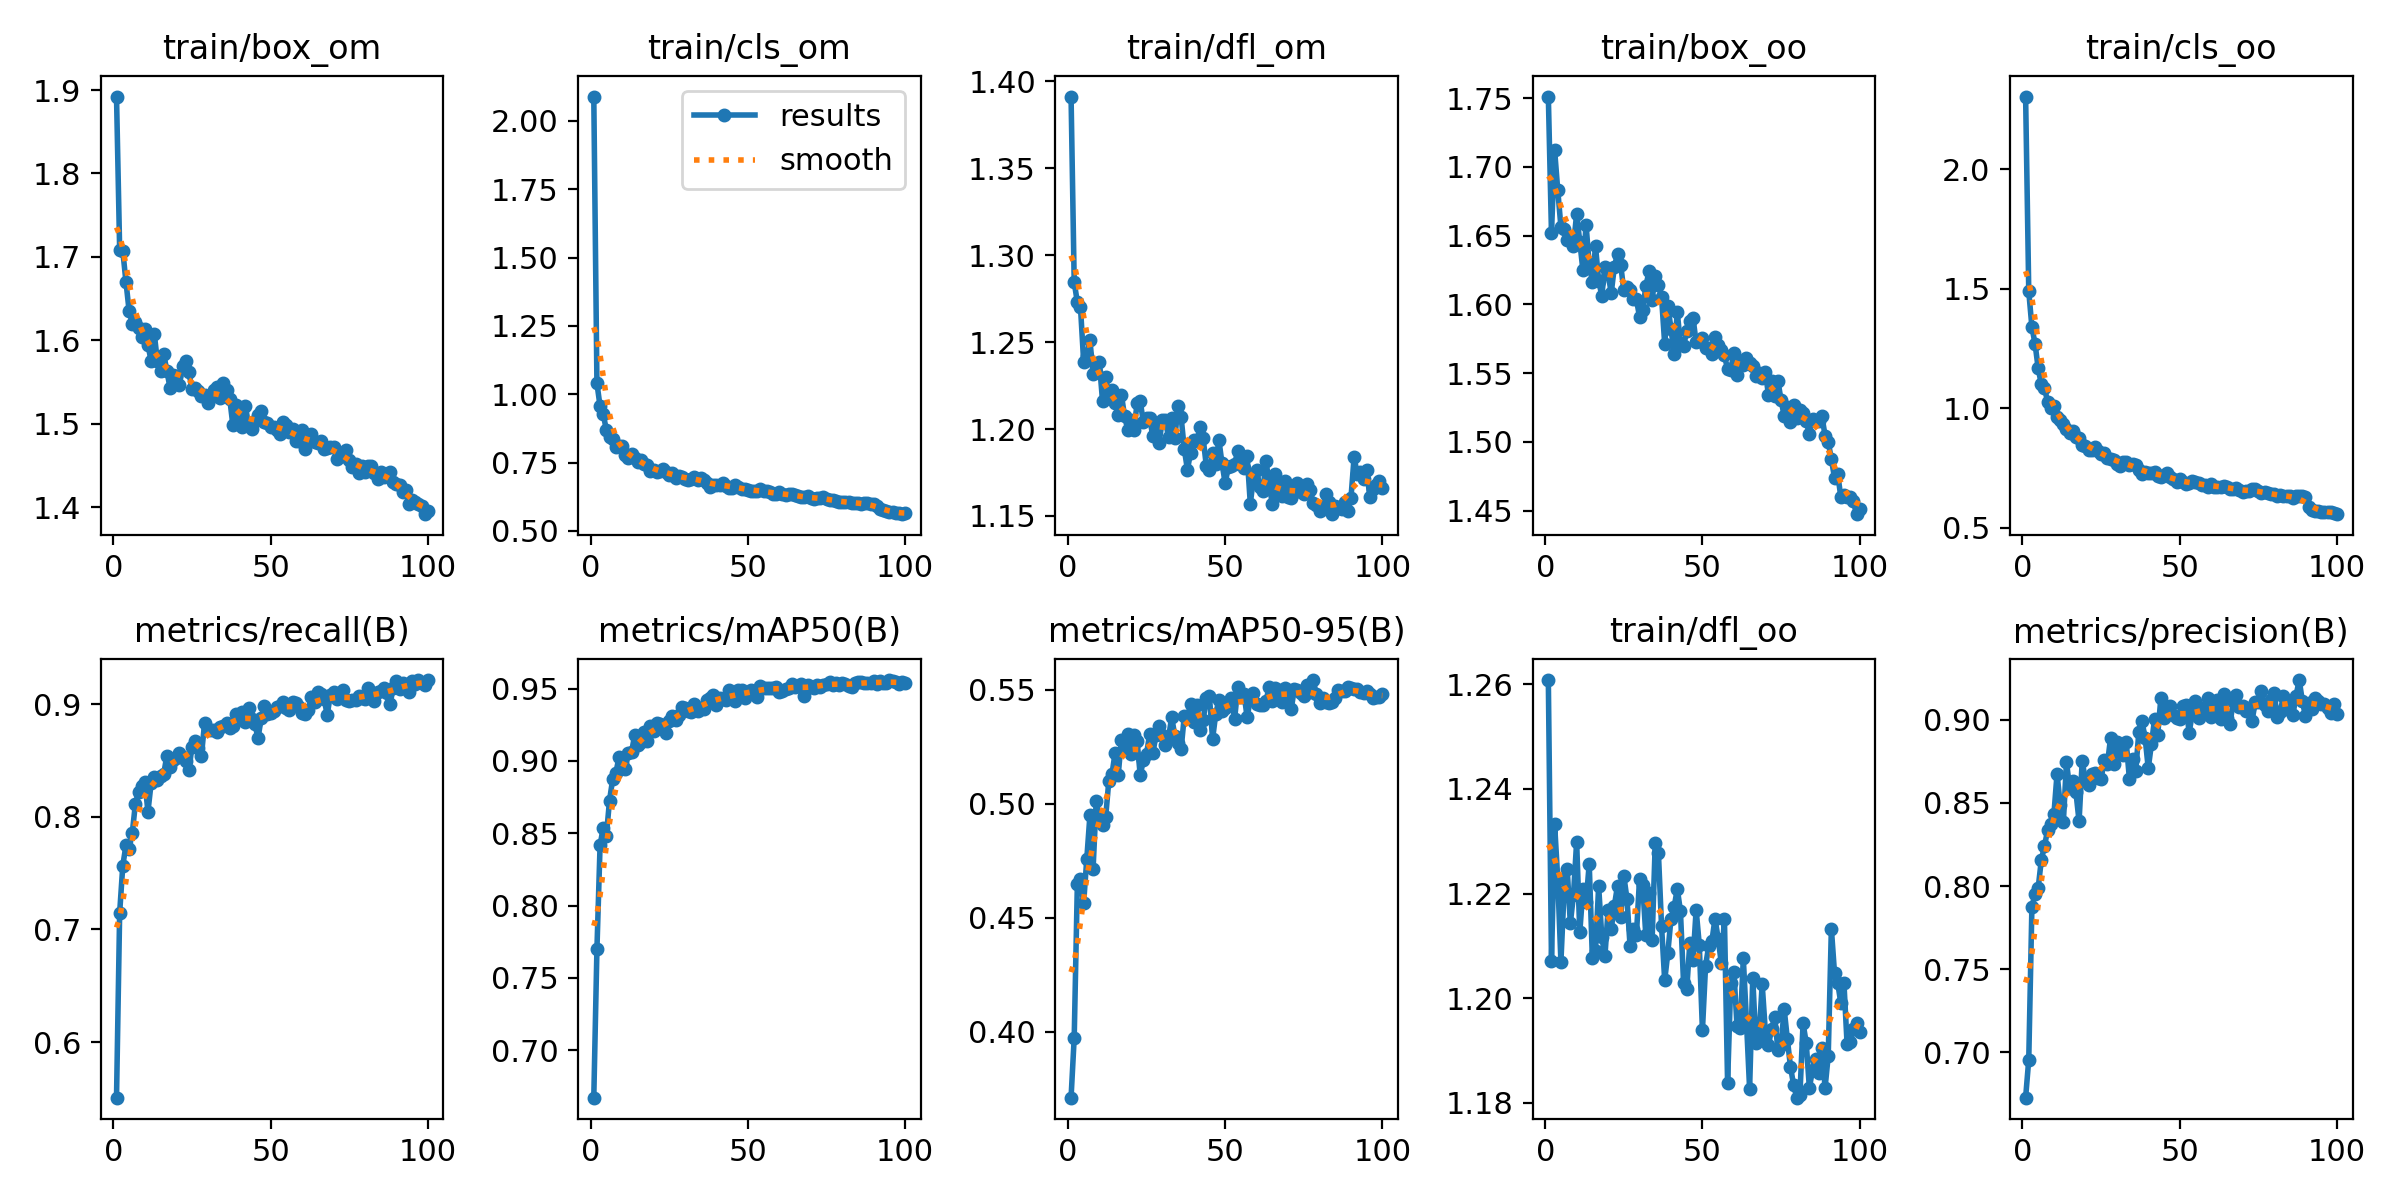

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [24]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/runs/detect/train2/weights/best.pt \
source={dataset.location}/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 587, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 441, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 177, in predict_cli
    for _ in gen:  # noqa, running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen

/content


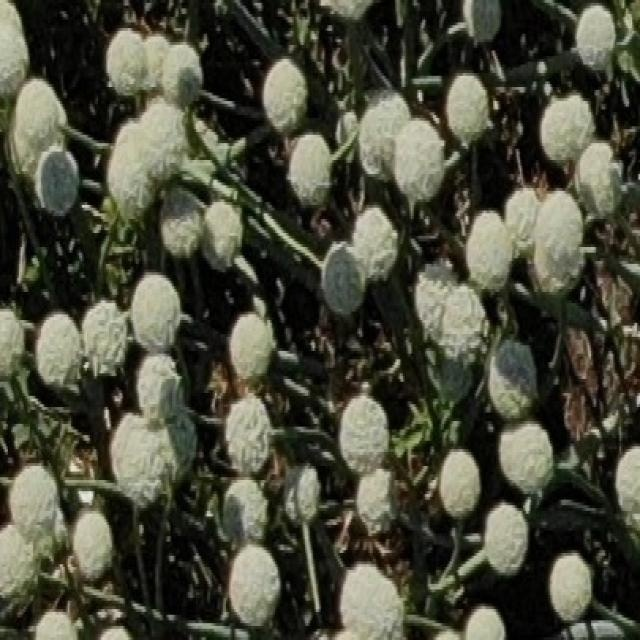

In [27]:
from IPython.display import Image

%cd {HOME}

Image(filename='runs/detect/predict2/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg', height=600)

In [31]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/datasets/OnionDetection-2/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/datasets/OnionDetection-2/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg: 640x640 (no detections), 15.2ms
Speed: 2.7ms preprocess, 15.2ms inference, 130.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [61]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')
results = model(source=f'{HOME}/test/', conf=0.5)


image 1/2 /content/test/1.JPG: 416x640 (no detections), 14.8ms
image 2/2 /content/test/1.png: 576x640 296 onions, 13.8ms
Speed: 2.9ms preprocess, 14.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)



0: 416x640 (no detections), 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


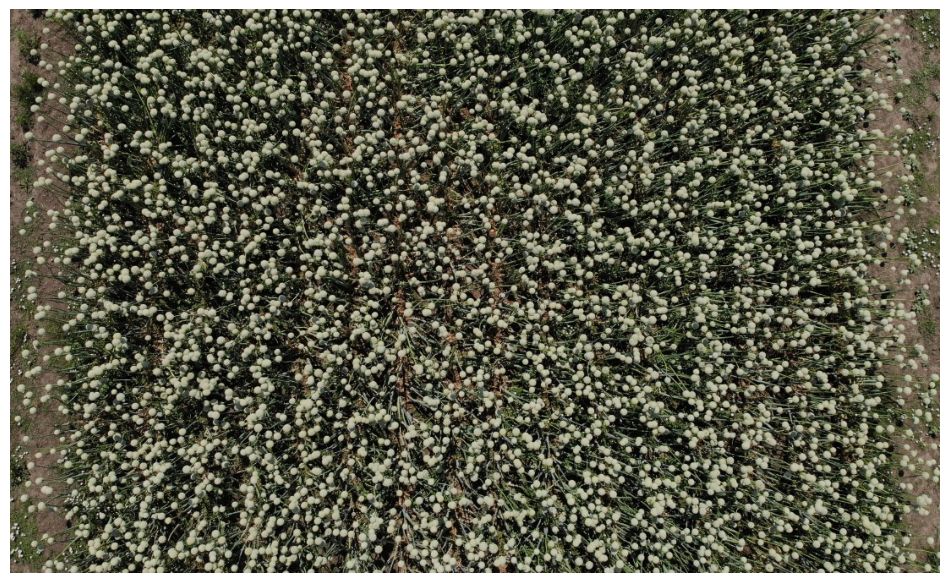

In [56]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')
image = cv2.imread(f'{HOME}/test/1.JPG')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/datasets/OnionDetection-2/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg \
--img-size 640

In [100]:
from ultralytics import YOLOv10
import cv2

# YOLOv10 modelini yükle
model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')

# Giriş resmi ve boyutları
input_image_path = f'{HOME}/test/1.JPG'
input_image_width = 1100
input_image_height = 667

# Çerçeve boyutları
frame_size = 128
overlap = 0  # Örtüşme miktarı olmadığı için 0

# Giriş resmini oku
input_image = cv2.imread(input_image_path)

# Her bir çerçeve için tahminlerde bulun
for i in range(0, input_image_height, frame_size):
    for j in range(0, input_image_width, frame_size):
        # Çerçeve başlangıç ve bitiş koordinatları
        start_x = j
        start_y = i
        end_x = min(start_x + frame_size, input_image_width)
        end_y = min(start_y + frame_size, input_image_height)

        # Çerçeve resmini al
        frame = input_image[start_y:end_y, start_x:end_x]

        # Tahminlerde bulun
        results = model(frame, conf=0.2)

        # results değişkeninin tipini kontrol et
        if isinstance(results, list):
            # Listenin ilk elemanını al
            results = results[0]

        # Çerçeve numarasını hesapla
        frame_number = (i // frame_size) * (input_image_width // frame_size) + (j // frame_size) + 1






0: 640x640 77 onions, 41.7ms
Speed: 2.8ms preprocess, 41.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 126 onions, 33.7ms
Speed: 5.2ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 123 onions, 35.3ms
Speed: 2.5ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 105 onions, 18.1ms
Speed: 6.0ms preprocess, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 120 onions, 18.8ms
Speed: 2.9ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 118 onions, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 120 onions, 9.9ms
Speed: 2.5ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 105 onions, 9.7ms
Speed: 3.3ms preprocess, 9.7ms inference, 0.9ms postprocess per image at shap

In [119]:
from ultralytics import YOLOv10
import cv2

# YOLOv10 modelini yükle
model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')

# Giriş resmi ve boyutları
input_image_path = f'{HOME}/test/202.JPG'
input_image_width = 4064
input_image_height = 2280

# Çerçeve boyutları
frame_size = 128
overlap = 0  # Örtüşme miktarı olmadığı için 0

# Giriş resmini oku
input_image = cv2.imread(input_image_path)

# Toplam soğan sayısını saklamak için değişkeni tanımla
total_onion_count = 0

# Her bir çerçeve için tespit sonuçlarını al ve soğan sayılarını topla
for i in range(0, input_image_height, frame_size):
    for j in range(0, input_image_width, frame_size):
        # Çerçeve başlangıç ve bitiş koordinatları
        start_x = j
        start_y = i
        end_x = min(start_x + frame_size, input_image_width)
        end_y = min(start_y + frame_size, input_image_height)

        # Çerçeve resmini al
        frame = input_image[start_y:end_y, start_x:end_x]

        # Tahminlerde bulun
        results = model(frame, conf=0.2)

        # results değişkeninin tipini kontrol et
        if isinstance(results, list):
            # Listenin ilk elemanını al
            results = results[0]

        # Soğan sayısını topla
        total_onion_count += len(results.boxes)

# Toplam soğan sayısını yazdır
print("Toplam soğan sayısı:", total_onion_count)



0: 640x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 21.2ms
Speed: 2.7ms preprocess, 21.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 16.1ms
Speed: 2.8ms preprocess, 16.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 onions, 15.8ms
Speed: 2.5ms preprocess, 15.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 onions, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 onions, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 onions, 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 onions, 12.6ms
Speed: 2.4ms preprocess, 12.6ms inference, 0.9ms postprocess per 